In [193]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from matplotlib import *
import scipy.io
%matplotlib inline
from PIL import Image
import csv,glob,os,itertools,time

import numpy as np
from random import randint

from sklearn.neighbors import KernelDensity

font = {'fontsize': 16, 'fontweight':'bold'}

C:\Users\Dan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Dan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\Dan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Dan\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and wil

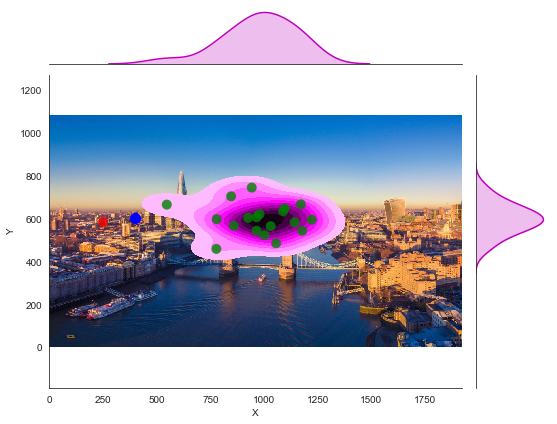

In [194]:
import matplotlib.image as mpimg

fig = plt.figure(num=None, figsize=(10, 6), dpi= 200, facecolor='w', edgecolor='k')
frame = mpimg.imread("Test_image.jpeg")


# example eye movmement data from normal observers 
mean, cov = [900, 600], [(50000, 1), (1, 4000)]
data = np.random.multivariate_normal(mean, cov, 20)
df = pd.DataFrame(data, columns=["x", "y"])
xy_train_or  = df

# Outliers from the data are removed using isolationforest algorithm

#clf = LocalOutlierFactor(n_neighbors = 20, contamination = .05,metric = 'euclidean')
#y_pred = clf.fit_predict(xy_train_or)    

clf = IsolationForest(n_estimators = 100,contamination = .05)
clf.fit(xy_train_or)
y_pred = clf.predict(xy_train_or) 
    
clf.fit(xy_train_or)
y_pred = clf.predict(xy_train_or)            

xy_train = xy_train_or[y_pred == 1]
outlier = xy_train_or[y_pred == -1] 

# data from a test participant (can be from the normal or patient group)
xt = 400; yt = 600;

g = sns.jointplot(x="x", y="y", data=xy_train, kind="kde", color="m",joint_kws=dict(shade_lowest=False))
       
g.ax_joint.collections[0].set_alpha(0)
g.ax_joint.imshow(frame,extent=[0,1920,0,1080])

    
g.fig.set_figwidth(8);  g.fig.set_figheight(6)    
g.ax_joint.scatter(xt, yt,c = "b",s = 100)

# outliers data
if len( outlier)>0:        
    g.ax_joint.scatter(outlier.x, outlier.y, alpha = 0.8, s = 100, edgecolors ='none', c ="r")

# control data (data points that generate the kde)
g.ax_joint.scatter(xy_train.x, xy_train.y, alpha = 0.8, s = 100, edgecolors ='none', c="g")


g.set_axis_labels("X", "Y");
#g.ax_marg_x.set_xlim(0, 1000)
#g.ax_marg_y.set_ylim(00, 1280)